<a href="https://colab.research.google.com/github/abhaysrivastav/Pytorch/blob/master/Perceptorn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np  
import matplotlib.pyplot as plt   
from sklearn import datasets
import torch
import torch.nn as nn

In [0]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]] 
X , y = datasets.make_blobs(n_samples=n_pts, random_state= 123,   centers=centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

In [0]:
def scatter_plot():
  plt.scatter(X[y == 0, 0], X[y == 0, 1])
  plt.scatter(X[y == 1, 0], X[y == 1, 1])

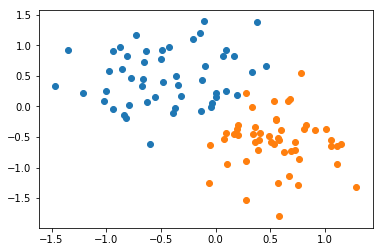

In [73]:
scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, X):
    pred = torch.sigmoid(self.linear(X))
    return pred

In [75]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))


[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [0]:
 [w, b] = model.parameters() 
 def get_params():
   return (w1.item(), w2.item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1 , w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

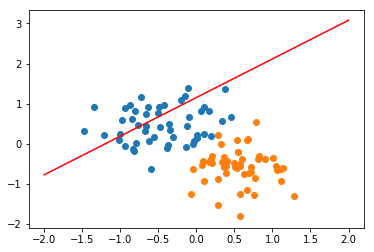

In [78]:
plot_fit('Initial Model')

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [80]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epochs : ", i , " loss", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epochs :  0  loss 0.6185115575790405
epochs :  1  loss 0.6174639463424683
epochs :  2  loss 0.6164201498031616
epochs :  3  loss 0.6153794527053833
epochs :  4  loss 0.614342451095581
epochs :  5  loss 0.6133086681365967
epochs :  6  loss 0.6122783422470093
epochs :  7  loss 0.6112515330314636
epochs :  8  loss 0.6102280616760254
epochs :  9  loss 0.6092080473899841
epochs :  10  loss 0.6081910729408264
epochs :  11  loss 0.6071775555610657
epochs :  12  loss 0.606167733669281
epochs :  13  loss 0.6051608920097351
epochs :  14  loss 0.604157567024231
epochs :  15  loss 0.6031574606895447
epochs :  16  loss 0.602160632610321
epochs :  17  loss 0.6011670827865601
epochs :  18  loss 0.6001767516136169
epochs :  19  loss 0.599189817905426
epochs :  20  loss 0.5982059240341187
epochs :  21  loss 0.5972254276275635
epochs :  22  loss 0.5962479114532471
epochs :  23  loss 0.5952739119529724
epochs :  24  loss 0.5943028926849365
epochs :  25  loss 0.5933352112770081
epochs :  26  loss 0.592370

Text(0.5, 0, 'epochs')

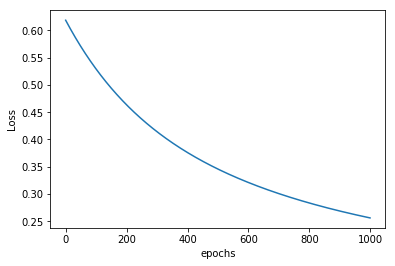

In [81]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epochs')

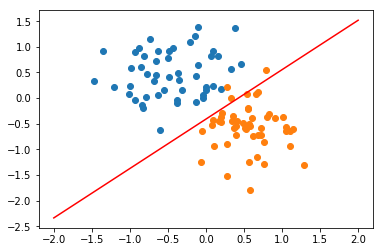

In [82]:
plot_fit('Trained Model')